In [1]:
from nmm import csolve,OhmicBath,OverdampedBath
from qutip import Qobj,sigmaz,sigmax
import numpy as np

In [2]:
w0 = 1
alpha = 0.05
gamma = 5*w0
T = 1*w0
tf = 4
t=np.linspace(0,tf,100)
Hsys = sigmaz()/2
Q = sigmax()

In [3]:
bath=OhmicBath(T,alpha,gamma)
bath2 = OverdampedBath(T,alpha,gamma)

In [4]:
cc = csolve(Hsys,t ,[bath], [Q])
cc2 = csolve(Hsys, t ,[bath2], [Q],eps=1e-6)

In [5]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [8]:
result=cc.generator()

Calculating the generator ...: 100%|██████████| 4/4 [00:00<00:00, 1225.51it/s]


In [9]:
result

[[Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
  Qobj data =
  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]],
  Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
  Qobj data =
  [[-0.00221198+0.00000000e+00j  0.        +0.00000000e+00j
     0.        +0.00000000e+00j  0.00220122+0.00000000e+00j]
   [ 0.        +0.00000000e+00j -0.0022066 +0.00000000e+00j
     0.00220479-8.91308465e-05j  0.        +0.00000000e+00j]
   [ 0.        +0.00000000e+00j  0.00220479+8.91308465e-05j
    -0.0022066 +0.00000000e+00j  0.        +0.00000000e+00j]
   [ 0.00221198+0.00000000e+00j  0.        +0.00000000e+00j
     0.        +0.00000000e+00j -0.00220122+0.00000000e+00j]],
  Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
  Qobj data =
  [[-0.00846168+0.j          0.        +0.j          0.        +0.j
     0.0083046 +0.j        ]
   [ 0.        +0.

In [7]:
result2 = cc2.evolution(rho0)

Computing Exponential of Generators . . . .: 100%|██████████| 100/100 [00:00<00:00, 619.96it/s]


In [8]:
import matplotlib.pyplot as plt

In [9]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [10]:
# bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
# solver = HEOMSolver(Hsys, bath, max_depth=5)
# result_h = solver.run(rho0, t)

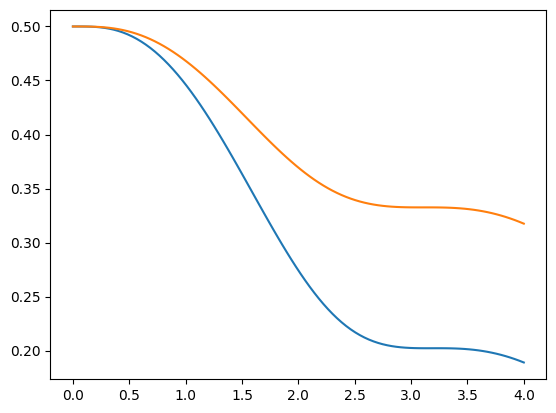

In [11]:
plt.plot(t,np.abs(population(result,0,1)))
plt.plot(t, np.abs(population(result2, 0, 1)))
# plt.plot(t, np.abs(population(result_h.states, 0, 1)))
# plt.show()

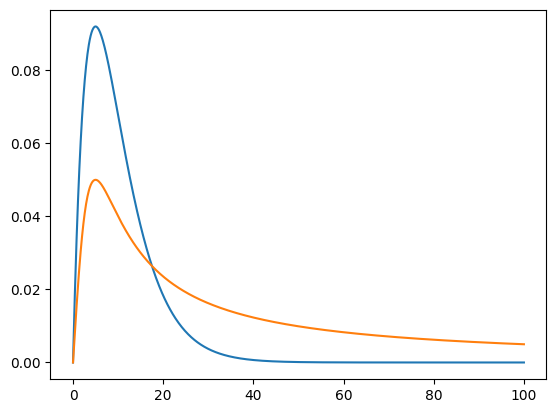

In [14]:
w=np.linspace(0,100,1000)
plt.plot(w,bath.spectral_density(w))
plt.plot(w,bath2.spectral_density(w))